Uses information from .nc files to calculate brightness temperatures.

https://www.goes-r.gov/users/docs/PUG-L1b-vol3.pdf

temp  =  [ fk2 / (alog((fk1 / rad) + 1))  -  bc1 ] / bc2

In [2]:
import xarray as xr
import metpy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [5]:
myFile = xr.open_dataset('../../GOES_Files/test_files/OR_ABI-L1b-RadC-M3C07_G17_s20183171802219_e20183171805003_c20183171805037.nc')

rad = myFile.metpy.parse_cf('Rad')

fk1 = float(myFile.metpy.parse_cf('planck_fk1'))
fk2 = float(myFile.metpy.parse_cf('planck_fk2'))

bc1 = float(myFile.metpy.parse_cf('planck_bc1'))
bc2 = float(myFile.metpy.parse_cf('planck_bc2'))

In [6]:
temp = (fk2/(xr.ufuncs.log(fk1/rad + 1)) - bc1)/bc2

In [7]:
temp

<xarray.DataArray 'Rad' (y: 1500, x: 2500)>
array([[271.0073 , 270.87692, 270.4814 , ..., 276.85196, 274.50375,
        271.39404],
       [270.87692, 269.94336, 268.10236, ..., 276.6476 , 277.05457,
        276.95346],
       [269.94336, 265.44507, 260.2246 , ..., 276.02417, 275.9187 ,
        276.85196],
       ...,
       [280.7054 , 279.45575, 281.30768, ..., 291.96664, 294.81888,
        297.68567],
       [282.3895 , 284.72397, 289.72223, ..., 296.8414 , 298.41574,
        298.41574],
       [285.60175, 286.17093, 290.86758, ..., 297.86996, 298.14413,
        297.45364]], dtype=float32)
Coordinates:
    t          datetime64[ns] ...
  * y          (y) float32 4.588e+06 4.586e+06 4.584e+06 ... 1.586e+06 1.584e+06
  * x          (x) float32 -2.504e+06 -2.502e+06 ... 2.502e+06 2.504e+06
    y_image    float32 0.08624
    x_image    float64 0.0
    metpy_crs  object Projection: geostationary

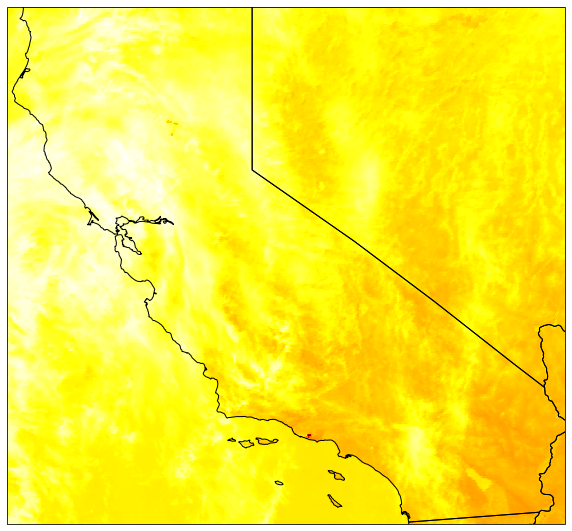

In [8]:
geos = temp.metpy.cartopy_crs
pc = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection=pc)

x = temp.x
y = temp.y

ax.set_extent([-124.50, -114.25, 32.50, 42.00], crs=pc)

ax.imshow(temp, origin='upper',
           extent=(x.min(), x.max(), y.min(), y.max()),
           transform=geos,
           interpolation='none',
           cmap = 'hot_r')
ax.add_feature(ccrs.cartopy.feature.STATES)